In [41]:
from sklearn import cluster, datasets
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from numpy import genfromtxt


[0.33599933750820327, 0.09010384421556775, 0.06814398406806389, 0.07163705099443354, 0.050855955226197, 0.04552147292458205, 0.047329733929186144, 0.045291286889570764, 0.04830784999053954, 0.05089889266203264, 0.05509430483924787, 0.04930174654085893, 0.04404613747444254, 0.04159315145876377, 0.05024831086746149, 0.04678262888644968, 0.0408391829243189, 0.040723756460035135]


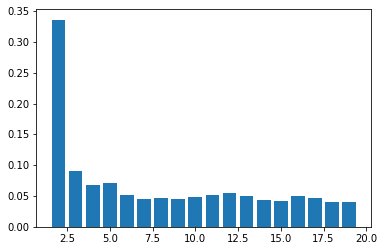

In [47]:

df1 = pd.read_csv("閱讀順序矩陣_依照編號(書名版).csv",index_col=0,header=0,encoding='utf-8')
df1=df1.loc[:, (df1 != 0).any(axis=0)]  ## 把dataframe的col部分 不等於0的col取出並重新指定入df1
df1= df1.loc[:, (df1 != 1).any(axis=0)]   ##把dataframe的col部分 不等於1的col取出並重新指定入df1
index=df1.index
# print(index)
columns=df1.columns
# print(columns)
# print(df1)
df1 = normalize(df1, axis=1, norm='max')
df1=pd.DataFrame(df1,index=index,columns=columns)
# print(df1)
df1=df1.T
# print(df1)
silhouette_avgs = []
ks = range(2, 20)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(df1)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(df1, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
# 作圖並印出 k = 2 到 20 的績效
plt.bar(ks, silhouette_avgs)


print(silhouette_avgs)

plt.show()


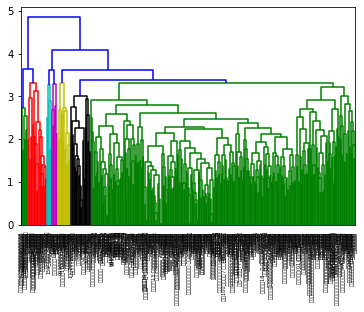

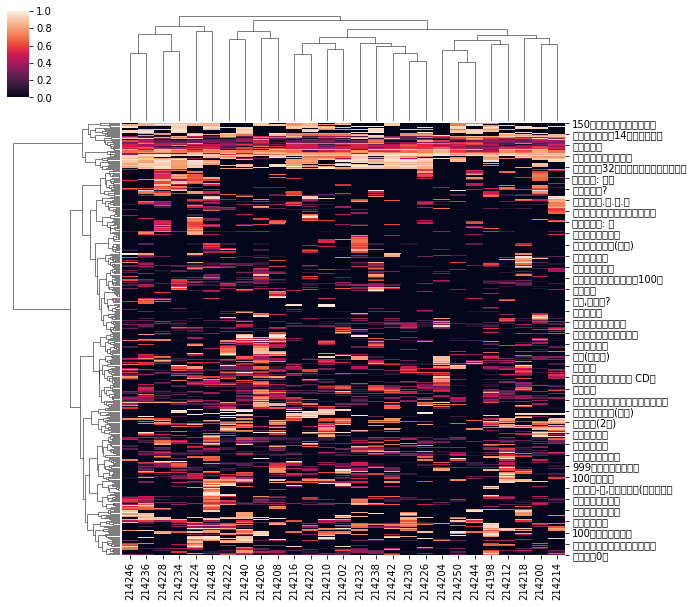

In [49]:

# row_dist = pd.DataFrame(squareform(pdist(df1, metric='euclidean')),
#                         columns=df1.index,
#                         index=df1.index)
# print(row_dist)
row_clusters = linkage(df1.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])
dendrogram(row_clusters,labels =df1.index)
sns.clustermap(df1,method ='ward',metric='euclidean')
plt.show()